In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)

# Scikit-learn apenas para 1. carregar o dataset, 2. separar treino e teste
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from perceptron import Perceptron

Teste da implementação de perceptron
=== Informações do dataset ===
Tamanho do dataset: (100, 2)
Número de classes: 2
Classes: [0 1]
Nomes das classes: ['setosa' 'versicolor']
Features usadas: ['sepal length (cm)', 'sepal width (cm)']
Tamanho do conjunto para treino: (80, 2)
Tamanho do conjunto para teste: (20, 2)


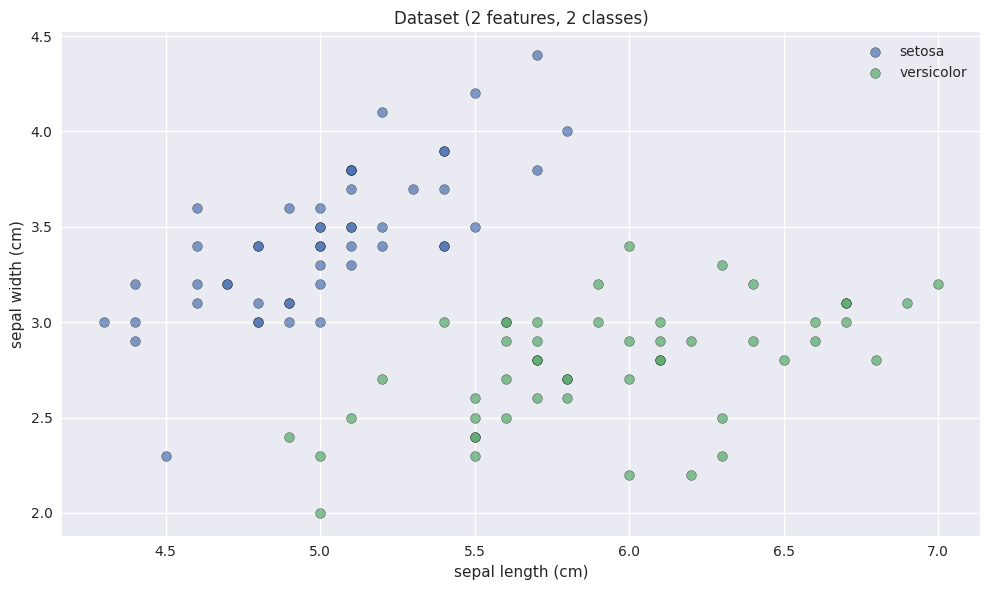

In [2]:
dataset = load_iris()
X = dataset.data[:100, :2]  # Usar as duas primeiras features, como visto em aula
y = dataset.target[:100]  # Usar as duas primeiras classes (0 e 1)

print("Teste da implementação de perceptron")
print("========================================")

print("=== Informações do dataset ===")

print(f"Tamanho do dataset: {X.shape}")
print(f"Número de classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")
print(f"Nomes das classes: {dataset.target_names[:2]}")
print(f"Features usadas: {dataset.feature_names[:2]}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamanho do conjunto para treino: {X_train.shape}")
print(f"Tamanho do conjunto para teste: {X_test.shape}")

plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        label=f"{dataset.target_names[label]}",
        alpha=0.7,
        edgecolor="k",
    )
plt.title("Dataset (2 features, 2 classes)")
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
print("=== Padronização dos dados de treino ===")

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)
std_train[std_train == 0] = 1.0  # Garantir que não há divisão por zero

X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train
X_scaled = (X - mean_train) / std_train

print(f"Antes da padronização - Média: {mean_train}")
print(f"Antes da padronização - Desvio padrão: {std_train}")
print(f"Depois da padronização - Média: {np.mean(X_train_scaled, axis=0)}")
print(f"Depois da padronização - Desvio padrão: {np.std(X_train_scaled, axis=0)}")

=== Padronização dos dados de treino ===
Antes da padronização - Média: [5.4725 3.075 ]
Antes da padronização - Desvio padrão: [0.65018747 0.46757352]
Depois da padronização - Média: [-2.72004641e-16  5.52335955e-16]
Depois da padronização - Desvio padrão: [1. 1.]


=== Treinamento do perceptron ===
Época 1/10, Loss (classificações incorretas) = 2
Época 2/10, Loss (classificações incorretas) = 0
Época 3/10, Loss (classificações incorretas) = 0
Época 4/10, Loss (classificações incorretas) = 0
Época 5/10, Loss (classificações incorretas) = 0
Época 6/10, Loss (classificações incorretas) = 0
Época 7/10, Loss (classificações incorretas) = 0
Época 8/10, Loss (classificações incorretas) = 0
Época 9/10, Loss (classificações incorretas) = 0
Época 10/10, Loss (classificações incorretas) = 0


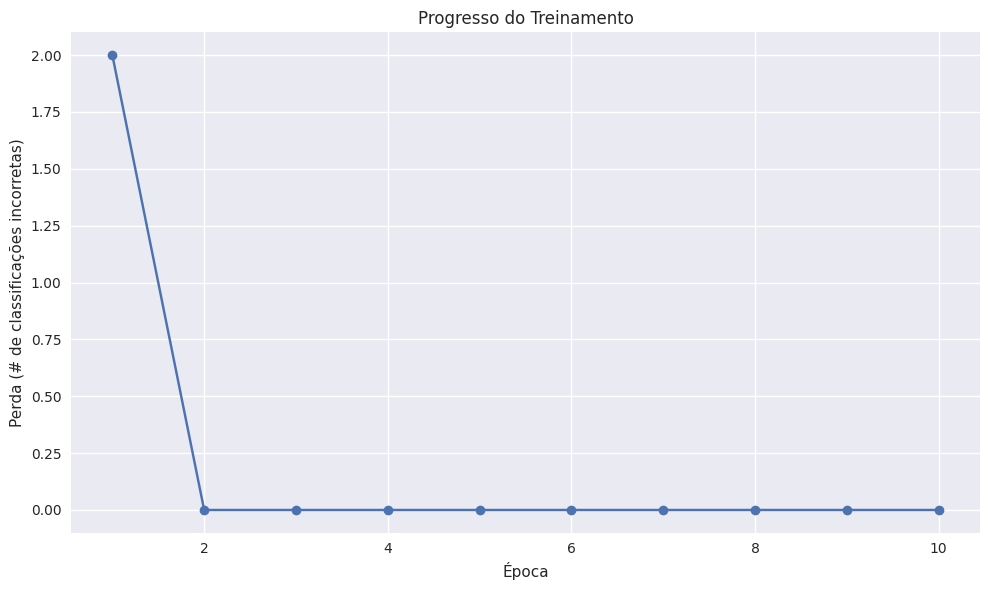

In [4]:
print("=== Treinamento do perceptron ===")
perceptron = Perceptron(num_inputs=2, learning_rate=0.01, random_seed=42)
losses = perceptron.fit(X_train_scaled, y_train, epochs=10)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, marker="o", linestyle="-")
plt.title("Progresso do Treinamento")
plt.xlabel("Época")
plt.ylabel("Perda (# de classificações incorretas)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
print("=== Resultados ===")

print(f"Pesos finais: {perceptron.weights}")
print(f"Viés final: {perceptron.bias}")

acc_train = perceptron.score(X_train_scaled, y_train)
acc_test = perceptron.score(X_test_scaled, y_test)

print(f"Acurácia no conjunto de treino: {acc_train * 100:.2f}%")
print(f"Acurácia no conjunto de teste: {acc_test * 100:.2f}%")

=== Resultados ===
Pesos finais: [ 0.03922649 -0.02009628]
Viés final: 0.01
Acurácia no conjunto de treino: 100.00%
Acurácia no conjunto de teste: 100.00%


In [6]:
print("=== Previsões ===")

for i in range(min(10, len(X_test_scaled))):
    x = X_test_scaled[i]
    true_y = y_test[i]
    pred_y = perceptron.predict(x)
    correct = "✓" if pred_y == true_y else "✗"
    print(
        f"Amostra {i+1}: Real={true_y} ({dataset.target_names[true_y]}), Previsto={pred_y} ({dataset.target_names[pred_y]}) {correct}"
    )

=== Previsões ===
Amostra 1: Real=1 (versicolor), Previsto=1 (versicolor) ✓
Amostra 2: Real=1 (versicolor), Previsto=1 (versicolor) ✓
Amostra 3: Real=1 (versicolor), Previsto=1 (versicolor) ✓
Amostra 4: Real=0 (setosa), Previsto=0 (setosa) ✓
Amostra 5: Real=0 (setosa), Previsto=0 (setosa) ✓
Amostra 6: Real=0 (setosa), Previsto=0 (setosa) ✓
Amostra 7: Real=0 (setosa), Previsto=0 (setosa) ✓
Amostra 8: Real=1 (versicolor), Previsto=1 (versicolor) ✓
Amostra 9: Real=0 (setosa), Previsto=0 (setosa) ✓
Amostra 10: Real=0 (setosa), Previsto=0 (setosa) ✓


=== Fronteira de decisão ===


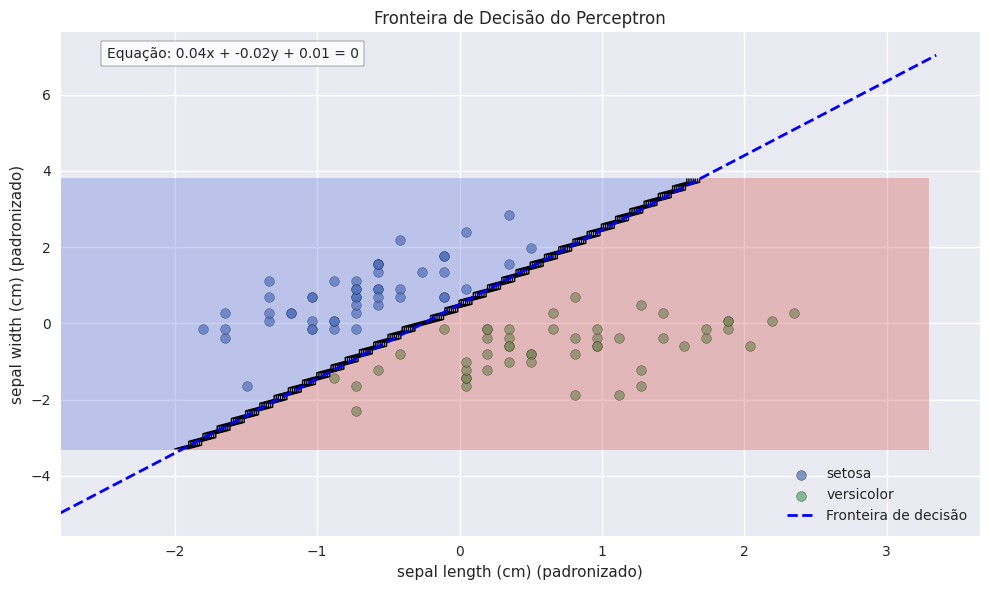

In [7]:
print("=== Fronteira de decisão ===")

plt.figure(figsize=(10, 6))

for label in np.unique(y):
    plt.scatter(
        X_scaled[y == label, 0],
        X_scaled[y == label, 1],
        label=f"{dataset.target_names[label]}",
        alpha=0.7,
        edgecolor="k",
    )

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors="k", linewidths=1)

weights = perceptron.weights
bias = perceptron.bias

# Se w[0]x + w[1]y + b = 0, então y = (-w[0]x - b) / w[1]
slope = -weights[0] / weights[1] if weights[1] != 0 else 0
intercept = -bias / weights[1] if weights[1] != 0 else 0

x_vals = np.array([x_min, x_max])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, "b--", linewidth=2, label="Fronteira de decisão")

eq_str = f"Equação: {weights[0]:.2f}x + {weights[1]:.2f}y + {bias:.2f} = 0"
plt.text(
    0.05,
    0.95,
    eq_str,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor="white", alpha=0.8),
)

plt.title("Fronteira de Decisão do Perceptron")
plt.xlabel(dataset.feature_names[0] + " (padronizado)")
plt.ylabel(dataset.feature_names[1] + " (padronizado)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()